# Plot of shot types over all teams in a season

In [178]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [179]:
from ift6758.data.data_acquisition import Season
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json 

#### I chose 2019 because I didn't dl it yet and it is noted as the best season of the decade from this [link](https://champsorchumps.us/records/best-nhl-regular-season-records)

In [180]:
pd.__version__

'1.3.3'

In [181]:
from  ift6758.data.data_acquisition import Season
season2019 = Season(2019,"../ift6758/data")
df = season2019.clean_data()
df.head()

File already Exists, loading from ../ift6758/data/PICKLE//2019_clean.pkl


,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie
0,Shot,2019010001,Vegas Golden Knights,1,00:52,REGULAR,19:08,-34.0,19.0,Wrist Shot,NaN,NaN,Reilly Smith,Adin Hill
1,Shot,2019010001,Arizona Coyotes,1,01:12,REGULAR,18:48,67.0,-15.0,Snap Shot,NaN,NaN,Robbie Russo,Malcolm Subban
2,Shot,2019010001,Vegas Golden Knights,1,01:46,REGULAR,18:14,-36.0,32.0,Snap Shot,NaN,NaN,Zach Whitecloud,Adin Hill
3,Goal,2019010001,Arizona Coyotes,1,04:00,REGULAR,16:00,42.0,-19.0,Snap Shot,False,Even,Ilya Lyubushkin,Malcolm Subban
4,Goal,2019010001,Vegas Golden Knights,1,04:39,REGULAR,15:21,-71.0,-3.0,Wrist Shot,False,Even,Max Pacioretty,Adin Hill


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83057 entries, 0 to 83056
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   result.event               83057 non-null  object 
 1   gamePk                     83057 non-null  object 
 2   team.name                  83057 non-null  object 
 3   about.period               83057 non-null  int64  
 4   about.periodTime           83057 non-null  object 
 5   about.periodType           83057 non-null  object 
 6   about.periodTimeRemaining  83057 non-null  object 
 7   coordinates.x              82987 non-null  float64
 8   coordinates.y              82987 non-null  float64
 9   result.secondaryType       82978 non-null  object 
 10  result.emptyNet            7815 non-null   object 
 11  result.strength.name       8037 non-null   object 
 12  shooter                    83057 non-null  object 
 13  goalie                     82659 non-null  obj

In [183]:
df['count'] = df['result.event']
df_teams = df[['result.event','team.name','result.secondaryType','count']]
df_teams= df_teams.groupby(['team.name','result.secondaryType','result.event'], as_index=False ).count()
#test = df_teams[df_teams['count']==9]
df_teams


,team.name,result.secondaryType,result.event,count
0,Anaheim Ducks,Backhand,Goal,25
1,Anaheim Ducks,Backhand,Shot,164
2,Anaheim Ducks,Deflected,Goal,3
3,Anaheim Ducks,Deflected,Shot,21
4,Anaheim Ducks,Slap Shot,Goal,16
...,...,...,...,...
452,Winnipeg Jets,Tip-In,Shot,59
453,Winnipeg Jets,Wrap-around,Goal,1
454,Winnipeg Jets,Wrap-around,Shot,12
455,Winnipeg Jets,Wrist Shot,Goal,137


In [241]:
team = pd.unique(df_teams['team.name'])
team = pd.DataFrame(team, columns=['team.name'])

#print(team)
shot = np.unique(df_teams['result.secondaryType'])
shot
#create shot with teams for plotting
goal_backhand = df_teams.loc[(df_teams['result.secondaryType'] == 'Backhand') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_b = pd.merge(team, goal_backhand, how='left', on=['team.name']).fillna(0)


goal_deflected = df_teams.loc[(df_teams['result.secondaryType'] == 'Deflected') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_d = pd.merge(team, goal_deflected, how='left', on=['team.name']).fillna(0)
    
    
goal_slap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Slap Shot') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_ss = pd.merge(team, goal_slap_shot, how='left', on=['team.name']).fillna(0)

goal_snap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Snap Shot') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_snap = pd.merge(team, shot_snap_shot, how='left', on=['team.name']).fillna(0)

goal_tip_in = df_teams.loc[(df_teams['result.secondaryType'] == 'Tip-In') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_t = pd.merge(team, goal_tip_in, how='left', on=['team.name']).fillna(0)

goal_wrap_arround = df_teams.loc[(df_teams['result.secondaryType'] == 'Wrap-around') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_wrap = pd.merge(team, goal_wrap_arround, how='left', on=['team.name']).fillna(0)

goal_wrist_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Wrist Shot') & (df_teams['result.event'] == 'Goal') ,['team.name','count']]
goal_wrist = pd.merge(team, goal_wrist_shot, how='left', on=['team.name']).fillna(0)

goal_wrist

,team.name,count
0,Anaheim Ducks,102
1,Arizona Coyotes,156
2,Boston Bruins,149
3,Buffalo Sabres,112
4,Calgary Flames,152
5,Carolina Hurricanes,127
6,Chicago Blackhawks,143
7,Colorado Avalanche,170
8,Columbus Blue Jackets,118
9,Dallas Stars,138


In [190]:
team = pd.unique(df_teams['team.name'])
team = pd.DataFrame(team, columns=['team.name'])

#print(team)
shot_type = np.unique(df_teams['result.secondaryType'])
shot_type
#create shot with teams for plotting
shot_backhand = df_teams.loc[(df_teams['result.secondaryType'] == 'Backhand') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_b = pd.merge(team, shot_backhand, how='left', on=['team.name']).fillna(0)


shot_deflected = df_teams.loc[(df_teams['result.secondaryType'] == 'Deflected') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_d = pd.merge(team, shot_deflected, how='left', on=['team.name']).fillna(0)
    
    
shot_slap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Slap Shot') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_ss = pd.merge(team, shot_slap_shot, how='left', on=['team.name']).fillna(0)

shot_snap_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Snap Shot') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_snap = pd.merge(team, shot_snap_shot, how='left', on=['team.name']).fillna(0)

shot_tip_in = df_teams.loc[(df_teams['result.secondaryType'] == 'Tip-In') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_t = pd.merge(team, shot_tip_in, how='left', on=['team.name']).fillna(0)

shot_wrap_arround = df_teams.loc[(df_teams['result.secondaryType'] == 'Wrap-around') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_wrap = pd.merge(team, shot_wrap_arround, how='left', on=['team.name']).fillna(0)

shot_wrist_shot = df_teams.loc[(df_teams['result.secondaryType'] == 'Wrist Shot') & (df_teams['result.event'] == 'Shot') ,['team.name','count']]
shot_wrist = pd.merge(team, shot_wrist_shot, how='left', on=['team.name']).fillna(0)

shot_b

,team.name,count
0,Anaheim Ducks,164.0
1,Arizona Coyotes,189.0
2,Boston Bruins,183.0
3,Buffalo Sabres,161.0
4,Calgary Flames,182.0
5,Carolina Hurricanes,182.0
6,Chicago Blackhawks,210.0
7,Colorado Avalanche,222.0
8,Columbus Blue Jackets,211.0
9,Dallas Stars,228.0


<AxesSubplot:title={'center':'Backhand shot/goal count per teams in 2019-2020 season'}, xlabel='team.name'>

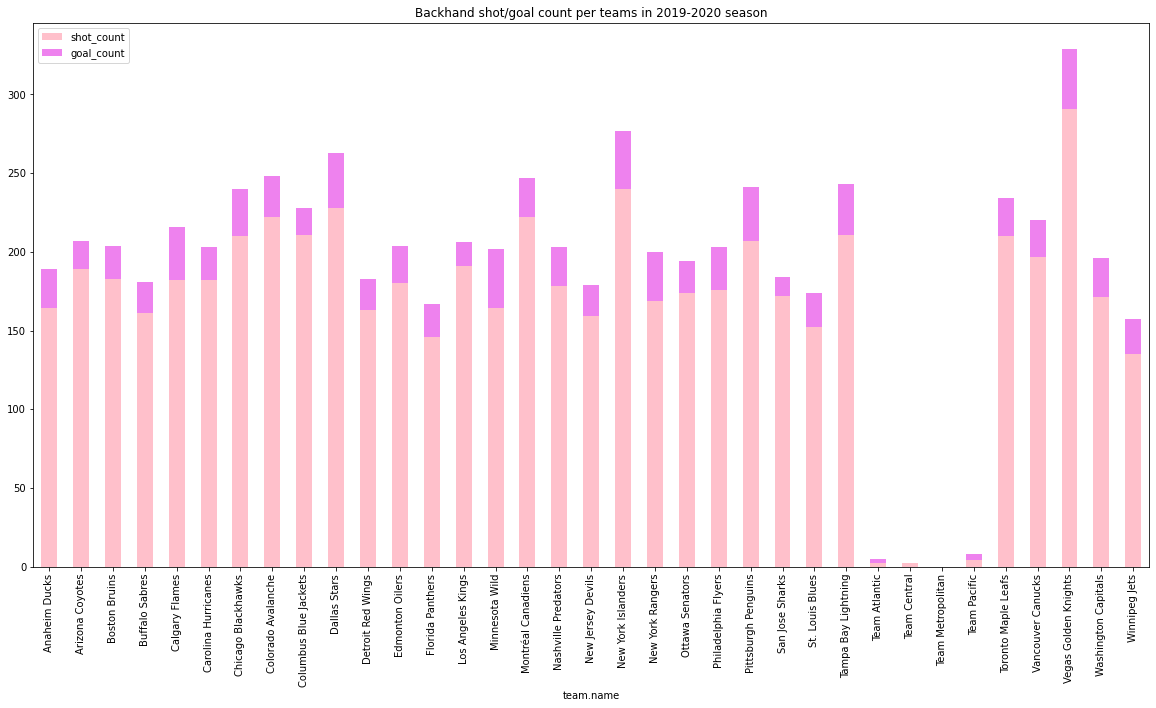

In [246]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
#the values we take are the folloing ones
#plot for backhand sht and goal
shot_b = shot_b.rename(columns={"count":"shot_count"}) 
goal_b = goal_b.rename(columns={"count":"goal_count"}) 

backhand = pd.merge(shot_b,goal_b, how="inner", on="team.name")
backhand.plot.bar(x='team.name',stacked=True,color={"shot_count":"pink", "goal_count":"violet"}, figsize=(20,10), title="Backhand shot/goal count per teams in 2019-2020 season")

<AxesSubplot:title={'center':'Deflected shot/goal count per teams in 2019-2020 season'}, xlabel='team.name'>

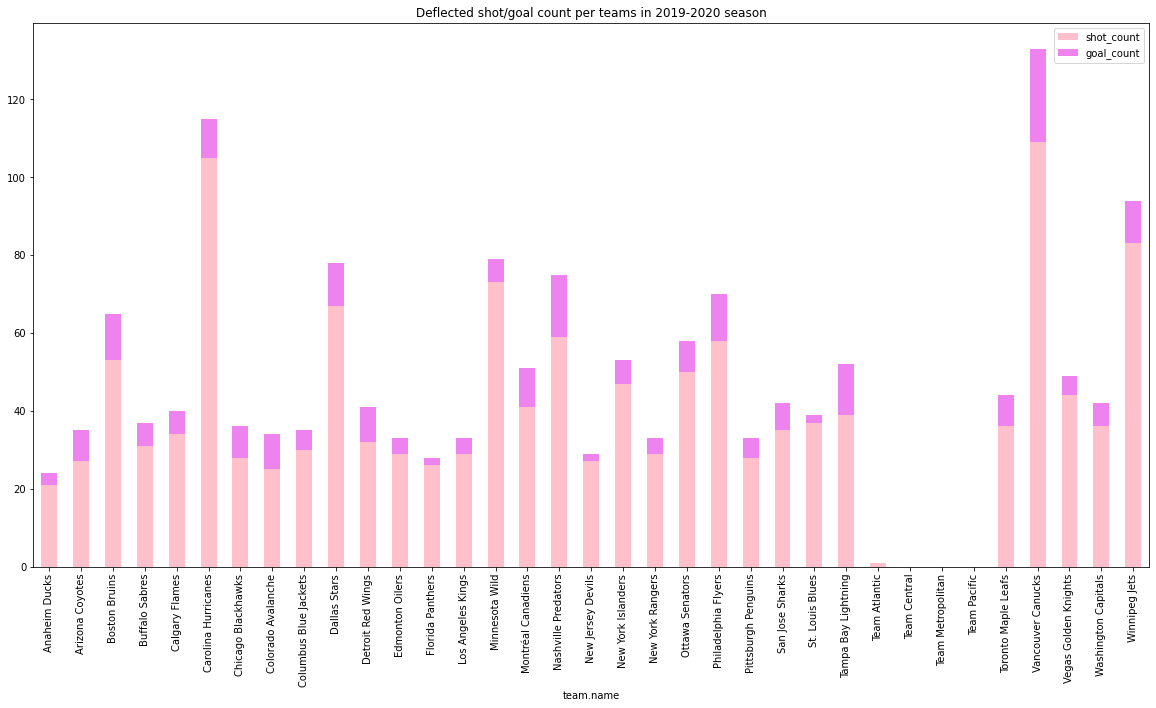

In [239]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
#the values we take are the folloing ones
#plot for backhand sht and goal
shot_d = shot_d.rename(columns={"count":"shot_count"}) 
goal_d = goal_d.rename(columns={"count":"goal_count"}) 

deflected = pd.merge(shot_d,goal_d, how="inner", on="team.name")
deflected.plot.bar(x='team.name',stacked=True,color={"shot_count":"pink", "goal_count":"violet"}, figsize=(20,10), title="Deflected shot/goal count per teams in 2019-2020 season")


<AxesSubplot:title={'center':'Slap Shot shot/goal count per teams in 2019-2020 season'}, xlabel='team.name'>

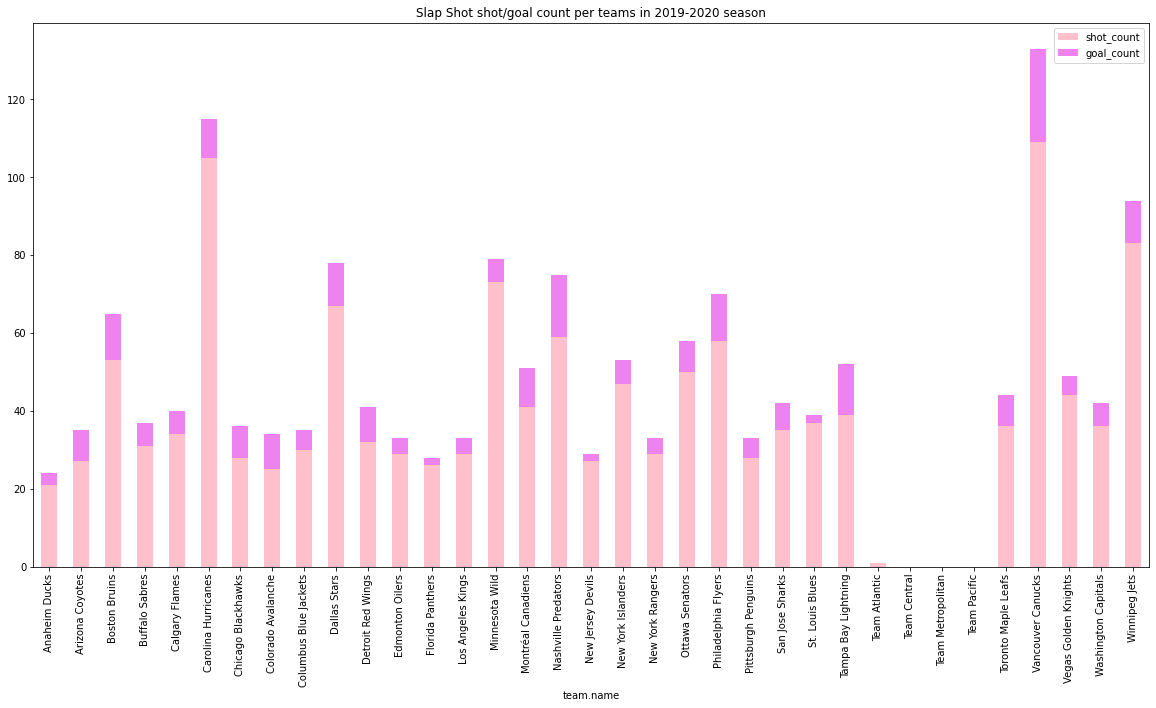

In [242]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
#the values we take are the folloing ones
#plot for backhand sht and goal
shot_ss = shot_ss.rename(columns={"count":"shot_count"}) 
goal_ss = goal_ss.rename(columns={"count":"goal_count"}) 

slap_shot = pd.merge(shot_ss,goal_ss, how="inner", on="team.name")
deflected.plot.bar(x='team.name',stacked=True,color={"shot_count":"pink", "goal_count":"violet"}, figsize=(20,10), title="Slap Shot shot/goal count per teams in 2019-2020 season")

<AxesSubplot:title={'center':'Snap shot/goal count per teams in 2019-2020 season'}, xlabel='team.name'>

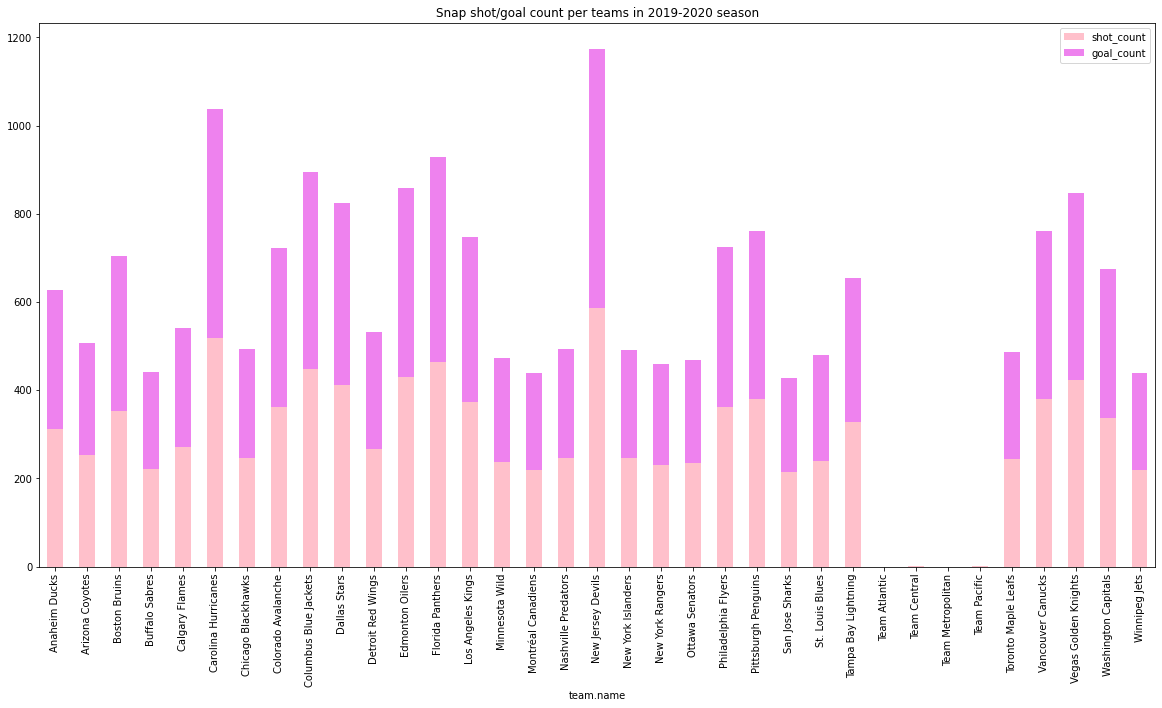

In [243]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
#the values we take are the folloing ones
#plot for backhand sht and goal
shot_snap = shot_snap.rename(columns={"count":"shot_count"}) 
goal_snap = goal_snap.rename(columns={"count":"goal_count"}) 

snap_shot = pd.merge(shot_snap,goal_snap, how="inner", on="team.name")
snap_shot.plot.bar(x='team.name',stacked=True,color={"shot_count":"pink", "goal_count":"violet"}, figsize=(20,10), title="Snap shot/goal count per teams in 2019-2020 season")

<AxesSubplot:title={'center':'Tip-in shot/goal count per teams in 2019-2020 season'}, xlabel='team.name'>

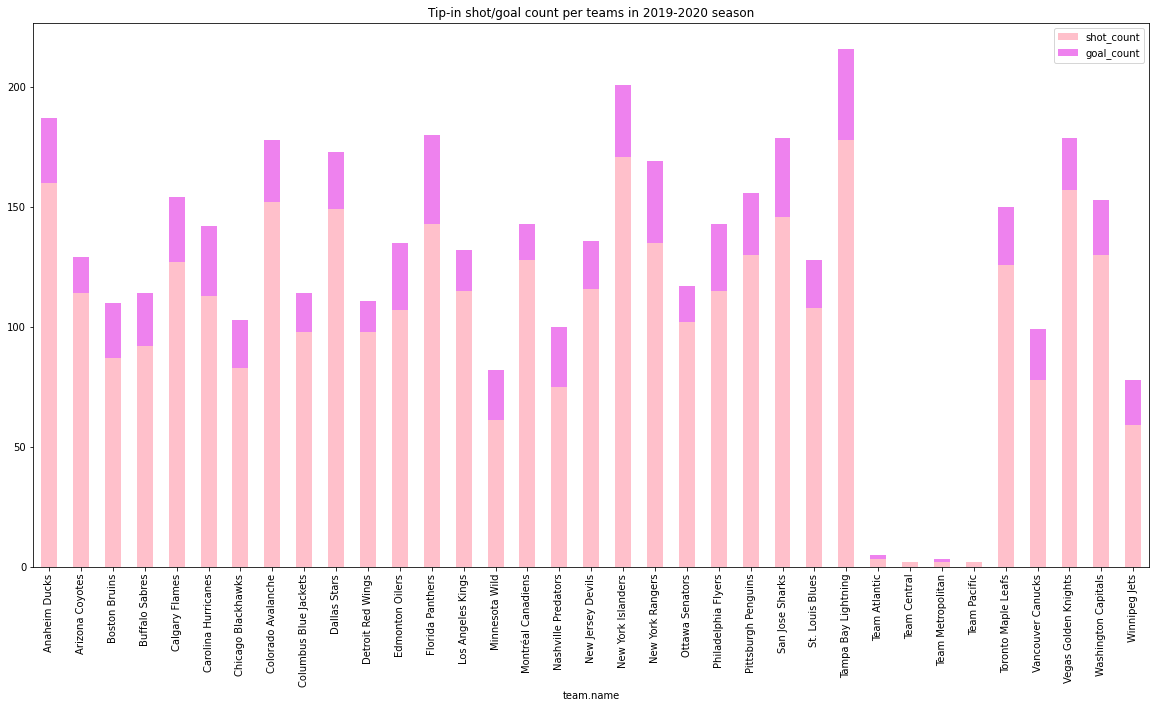

In [244]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
#the values we take are the folloing ones
#plot for backhand sht and goal
shot_t = shot_t.rename(columns={"count":"shot_count"}) 
goal_t = goal_t.rename(columns={"count":"goal_count"}) 

tip_in = pd.merge(shot_t,goal_t, how="inner", on="team.name")
tip_in.plot.bar(x='team.name',stacked=True,color={"shot_count":"pink", "goal_count":"violet"}, figsize=(20,10), title="Tip-in shot/goal count per teams in 2019-2020 season")

<AxesSubplot:title={'center':'Wrap arround shot/goal count per teams in 2019-2020 season'}, xlabel='team.name'>

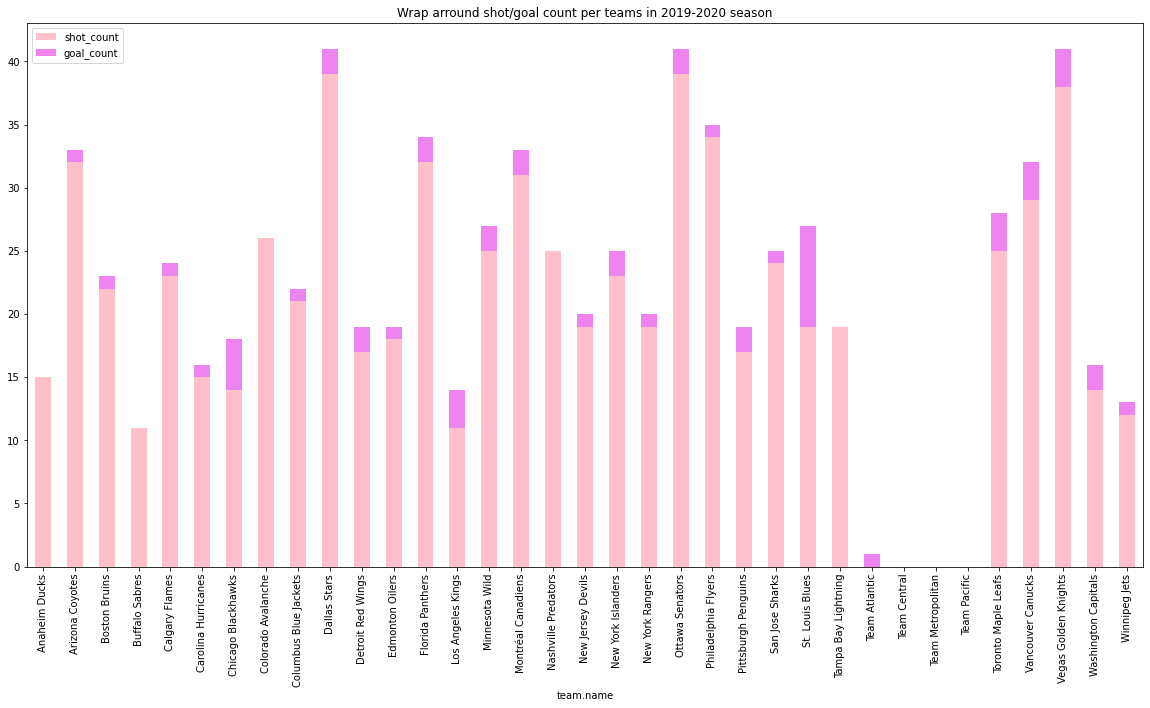

In [245]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
#the values we take are the folloing ones
#plot for backhand sht and goal
shot_wrap = shot_wrap.rename(columns={"count":"shot_count"}) 
goal_wrap = goal_wrap.rename(columns={"count":"goal_count"}) 

wrap_arround = pd.merge(shot_wrap,goal_wrap, how="inner", on="team.name")
wrap_arround.plot.bar(x='team.name',stacked=True,color={"shot_count":"pink", "goal_count":"violet"}, figsize=(20,10), title="Wrap arround shot/goal count per teams in 2019-2020 season")

<AxesSubplot:title={'center':'Wrist shot/goal count per teams in 2019-2020 season'}, xlabel='team.name'>

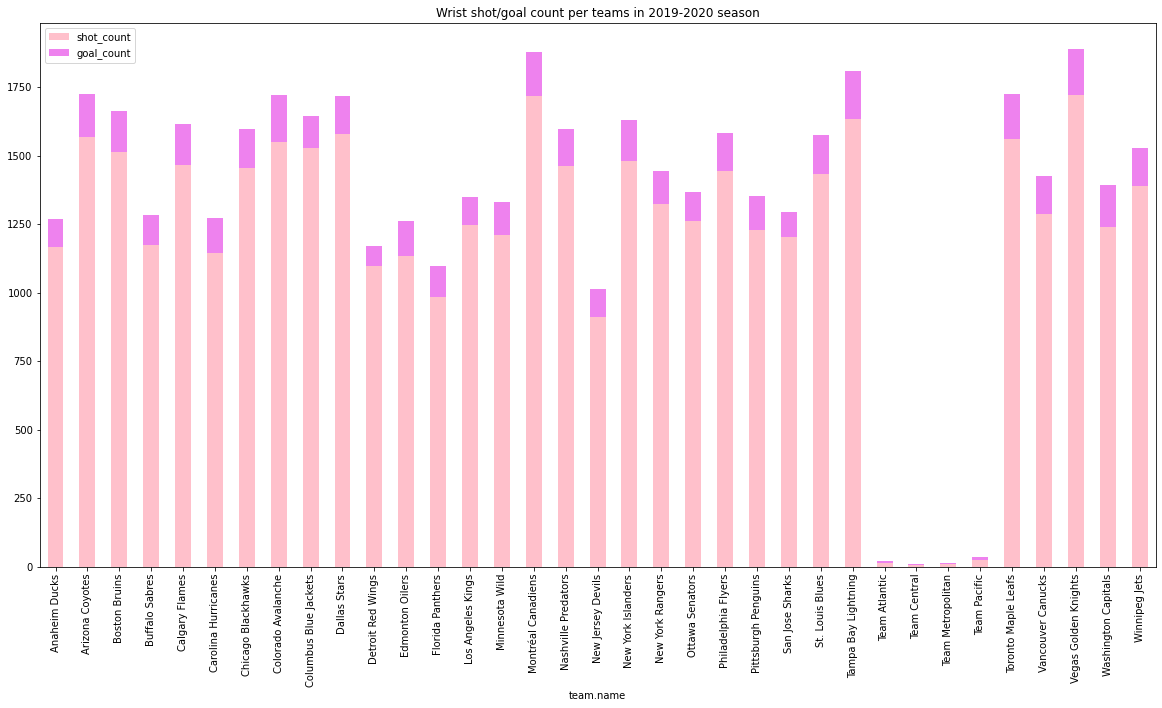

In [247]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
#the values we take are the folloing ones
#plot for backhand sht and goal
shot_wrist = shot_wrist.rename(columns={"count":"shot_count"}) 
goal_wrist = goal_wrist.rename(columns={"count":"goal_count"}) 

wrist_shot = pd.merge(shot_wrist,goal_wrist, how="inner", on="team.name")
wrist_shot.plot.bar(x='team.name',stacked=True,color={"shot_count":"pink", "goal_count":"violet"}, figsize=(20,10), title="Wrist shot/goal count per teams in 2019-2020 season")

In [238]:
shot

array(['Backhand', 'Deflected', 'Slap Shot', 'Snap Shot', 'Tip-In',
       'Wrap-around', 'Wrist Shot'], dtype=object)

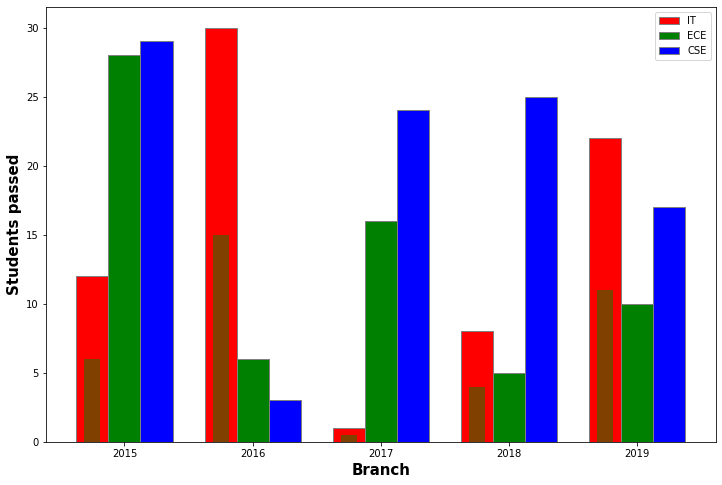

In [174]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = [12, 30, 1, 8, 22]  #IT, CSE, ECE will be replaced by Hockey Teams
ECE = [28, 6, 16, 5, 10]
CSE = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT') #First plot is for shots
plt.bar(br1, [i*0.5 for i in IT], color='green', width= 0.5*barWidth, alpha=0.5) #Second plot is for goals further we repeat this pattern for all teams.
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019']) #years would get replaced by different Shot Types Wrist shot, Slapshot, Snap shot, Backhanders, tip in
 
plt.legend()
plt.show()

In [1]:
# Try to take the coordindates at create a new "distance" column

In [2]:
from  ift6758.data.data_acquisition import Season
season2019 = Season(2019,"../ift6758/data")
df = season2019.clean_data()
df.head()

File already Exists, loading from ../ift6758/data/PICKLE//2019_clean.pkl


,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie
0,Shot,2019010001,Vegas Golden Knights,1,00:52,REGULAR,19:08,-34.0,19.0,Wrist Shot,NaN,NaN,Reilly Smith,Adin Hill
1,Shot,2019010001,Arizona Coyotes,1,01:12,REGULAR,18:48,67.0,-15.0,Snap Shot,NaN,NaN,Robbie Russo,Malcolm Subban
2,Shot,2019010001,Vegas Golden Knights,1,01:46,REGULAR,18:14,-36.0,32.0,Snap Shot,NaN,NaN,Zach Whitecloud,Adin Hill
3,Goal,2019010001,Arizona Coyotes,1,04:00,REGULAR,16:00,42.0,-19.0,Snap Shot,False,Even,Ilya Lyubushkin,Malcolm Subban
4,Goal,2019010001,Vegas Golden Knights,1,04:39,REGULAR,15:21,-71.0,-3.0,Wrist Shot,False,Even,Max Pacioretty,Adin Hill
